In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Mengubah parameter default matplotlib
Parameter default matplotlib dapat diubah dengan rcParams sebagai berikut (optional: estetika plot)


In [4]:
from matplotlib import rcParams

rcParams['figure.figsize'] = (12, 4)
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'small'
rcParams['ytick.labelsize'] = 'small'

## Load dataset

Untuk hands-on kita akan melihat dataset sintetik prediksi kebotakan. Agar running time-nya tidak terlalu lama, kali ini kita ambil sampel 1000 baris data saja.

In [5]:
# change file path if necessary
df = pd.read_csv('/content/drive/MyDrive/Rakamin/Trial Class - EDA/botak.csv').sample(1000, random_state=42)

## Descriptive Statistics
### Memeriksa kolom-kolom dan nilai hilang dengan `df.info()`

Hal pertama yang biasanya dilakukan dalam EDA adalah mengecek tipe data setiap kolom dan jumlah nilai yang hilang. Hal ini bisa kita lakukan dengan menggunakan `df.info()`.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1142 to 7212
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   umur           1000 non-null   float64
 1   jenis_kelamin  1000 non-null   object 
 2   pekerjaan      986 non-null    object 
 3   provinsi       1000 non-null   object 
 4   gaji           1000 non-null   float64
 5   is_menikah     1000 non-null   int64  
 6   is_keturunan   997 non-null    float64
 7   berat          1000 non-null   float64
 8   tinggi         1000 non-null   float64
 9   sampo          1000 non-null   object 
 10  is_merokok     1000 non-null   int64  
 11  pendidikan     1000 non-null   object 
 12  botak_prob     1000 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 109.4+ KB


Kita dapat melihat bahwa:
* Dataframe memiliki total 1000 baris dan 13 kolom
* Dataframe masih memiliki *null* values di kolom `pekerjaan` dan `jenis_kelamin`
* Target pemodelan adalah kolom `botak_prob` dengan tipe data `float64`
* Berarti sisanya adalah *feature* (predictor)

Dari informasi di atas, kita bisa pisahkan kolom kategorical dan numerical sebagai berikut:

In [7]:
# best practice
cats = ['jenis_kelamin', 'pekerjaan', 'sampo', 'pendidikan', 'provinsi']
nums = ['umur', 'gaji', 'is_menikah', 'is_keturunan', 'berat', 'tinggi', 'is_merokok', 'botak_prob']

Tentu saja menyimpan nama kolom berdasarkan tipe *numeric* dan *categorical* seperti di atas tidak wajib, tapi ini lumayan akan memudahkan beberapa proses ke depannya.

### Sampling untuk memahami data dengan `df.sample()`

Setelah mengetahui kolom apa saja yang ada di dalam dataset, kita lakukan sampling untuk memastikan apakah isi kolomnya sesuai ekspektasi. Biasakan lakukan ini beberapa kali karena seringkali apabila ada keanehan tidak akan keluar pada sampling pertama.

Sampling dapat dilakukan dengan menggunakan `df.sample()`

In [8]:
df.sample(5)

,umur,jenis_kelamin,pekerjaan,provinsi,gaji,is_menikah,is_keturunan,berat,tinggi,sampo,is_merokok,pendidikan,botak_prob
80,27.0,Perempuan,Pegawai swasta,Ambon,1.262660e+07,0,0.0,52.762142,157.032751,Pantone,0,SMA,0.128030
3824,39.0,Laki-laki,Pegawai swasta,Ambon,6.562732e+06,0,0.0,71.941476,172.200029,Pantone,0,S1,0.276507
6872,61.0,Perempuan,PNS,Bandung,6.601005e+06,1,0.0,46.723769,160.082428,Shoulder & Head,1,S2,0.633548
1793,45.0,Laki-laki,PNS,Jakarta,7.997526e+06,0,0.0,49.249712,151.885976,Shoulder & Head,0,S1,0.409914
367,39.0,Laki-laki,Freelance,Manokwari,7.281815e+06,0,0.0,48.390105,154.986574,Merpati,1,S1,0.179588


Beberapa pengamatan:
* Target kita, `botak_prob` benar bertipe float dengan *range* 0-1, dimana 1 melambangkan kemungkinan 100%
* Sepertinya tidak ada yang aneh dengan input setiap kolom (sudah sesuai)

### Statistical summary dengan `df.describe()`
Selanjutnya kita munculkan ringkasan statistik dataframe, baik untuk numerical dan categorical. Hal ini dilakukan untuk mengecek secara singkat akan keberadaan outlier dan karakteristik distribusi untuk `feature` numeric.

In [9]:
df[nums].describe()

,umur,gaji,is_menikah,is_keturunan,berat,tinggi,is_merokok,botak_prob
count,1000.000000,1.000000e+03,1000.000000,997.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,39.517000,9.338530e+06,0.035000,0.179539,55.960354,157.308522,0.485000,0.384868
std,10.031667,4.816192e+06,0.183872,0.383995,9.441493,6.550181,0.500025,0.193882
min,4.000000,1.990399e+06,0.000000,0.000000,41.754150,138.487317,0.000000,-0.115700
25%,33.000000,5.985189e+06,0.000000,0.000000,49.723461,152.782408,0.000000,0.241132
50%,39.000000,8.082501e+06,0.000000,0.000000,53.780701,156.979853,0.000000,0.365464
75%,46.000000,1.162239e+07,0.000000,0.000000,59.645683,161.242447,1.000000,0.508360
max,72.000000,3.713150e+07,1.000000,1.000000,128.643924,193.484937,1.000000,1.000000


Beberapa pengamatan dari *statistical summary* kolom numerik di atas:
* Distribusi nilai di kolom `umur` terlihat normal/simetrik (*mean* dan *median* cukup dekat, dan nilai Q2 kira2 tepat di tengah2 Q1 - Q3)
* Sedangkan kolom `gaji` tampaknya tidak simetrik, karena mean > median
* Ada baris yang memiliki probability `botak_prob` minus. Baris ini harus dihilangkan di tahap pre-processing nanti

In [10]:
# jumlah baris dengan botak_prob negative
df[df['botak_prob']<0].shape[0]

7

In [11]:
df[cats].describe()

,jenis_kelamin,pekerjaan,sampo,pendidikan,provinsi
count,1000,986,1000,1000,1000
unique,2,4,5,6,34
top,Laki-laki,Pegawai swasta,Merpati,S1,Mataram
freq,654,403,225,565,44


Beberapa pengamatan dari *statistical summary* kolom kategorikal di atas:
* Mayoritas data adalah Laki-laki (Top kolom `jenis_kelamin` adalah `Laki-laki` dengan frekuensi 684)
* Kolom `provinsi` memiliki jumlah nilai unik yang banyak;ada kemungkinan tidak terlalu berguna untuk menjadi predictor

## Univariate Analysis
Setelah melakukan analisis sederhana tentang statistik deskriptif, sekarang kita fokus pada satu-persatu kolom dengan *Univariate Analysis*

### Box plots

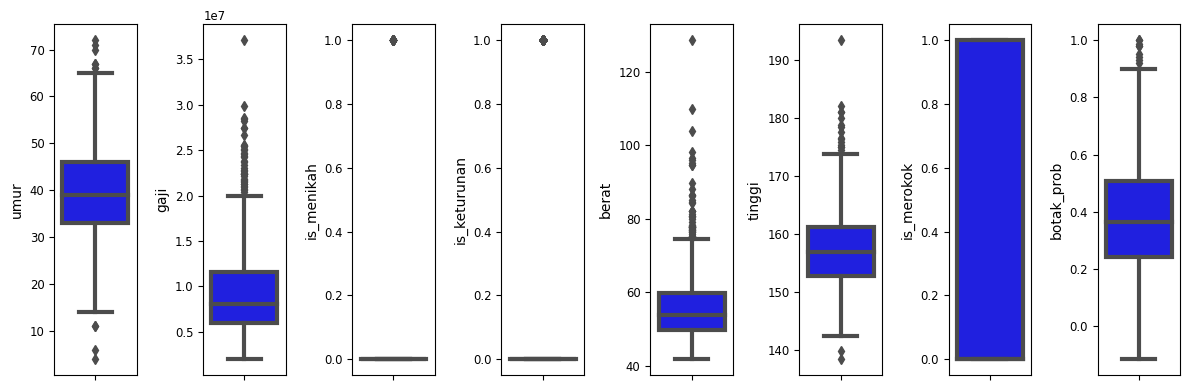

In [12]:
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df[nums[i]], color='blue', orient='v')
    plt.tight_layout()

Untuk boxplot, hal paling penting yang harus kita perhatikan adalah keberadaan outlier.
* Outlier terlihat utamanya pada kolom `gaji`, `berat`, dan `tinggi`
* Dari boxplotnya terlihat mana distribusi yang terlihat agak *skewed* (tidak simetrik) yang ditandai dengan lokasi box yang jauh dari daerah tengah sumbu Y: `gaji`, `berat`, `tinggi`

### Dist plots

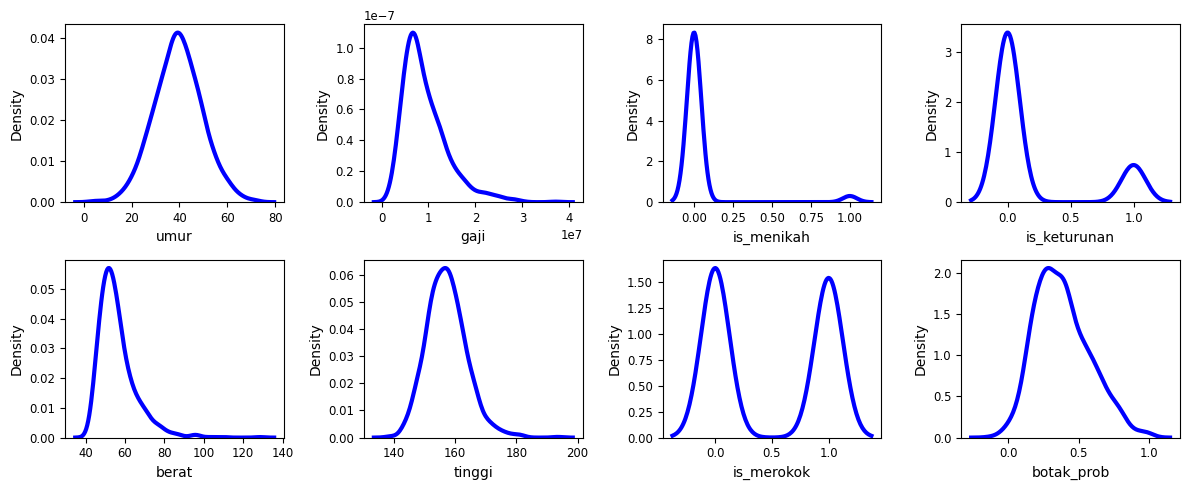

In [14]:
plt.figure(figsize=(12, 5))
for i in range(0, len(nums)):
    plt.subplot(2, len(nums)//2, i+1)
    sns.kdeplot(df[nums[i]], color='blue')
    plt.tight_layout()

Untuk distribution plot, hal utama yang perlu diperhatikan adalah bentuk distribusi:
* Seperti dugaan kita ketika melihat boxplot di atas, kolom `gaji`, `berat`, dan `tinggi` sedikit *skewed*
* Berarti ada kemungkinan kita perlu melakukan sesuatu pada kolom2 tersebut nantinya
* Selain kolom2 itu distribusinya terlihat cukup simetrik

### Count plot (categorical)

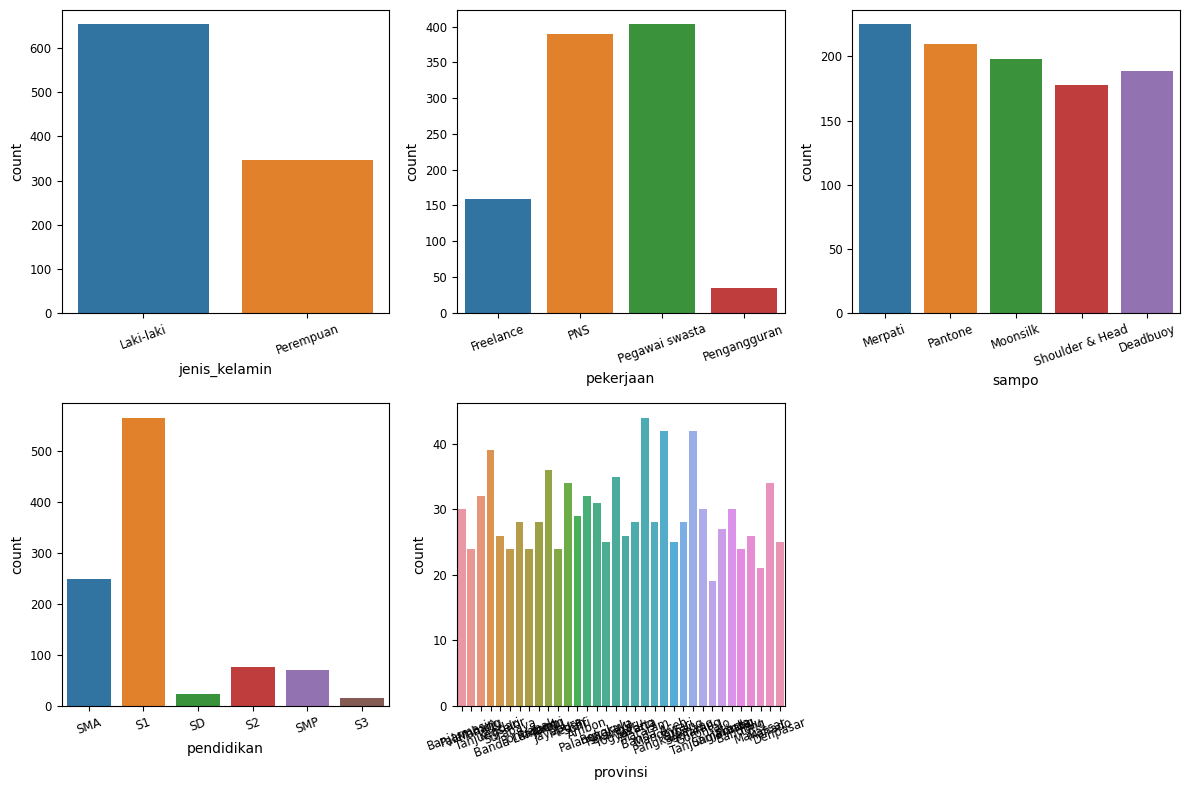

In [20]:
plt.figure(figsize=(12,8))

for i in range(0, len(cats)):
    plt.subplot(2, 3, i+1)
    sns.countplot(x=df[cats[i]])
    plt.xlabel(cats[i])
    plt.xticks(rotation=20)
    plt.tight_layout()

Terakhir kita lihat count plot untuk setiap data. Seperti pengamatan kita sebelumnya, distribusi `pendidikan` dan `pekerjaan` didominasi 1-2 value.


## Bivariate Analysis

Setelah menilik setiap kolom secara individual, sekarang kita akan melihat hubungan antar kolom. Mengetahui hubungan antar kolom dapat membantu kita memilih fitur-fitur yang paling penting dan mengesampingkan *feature* yang redundan.

### Correlation heatmap

<ipython-input-18-15f741498ca7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')


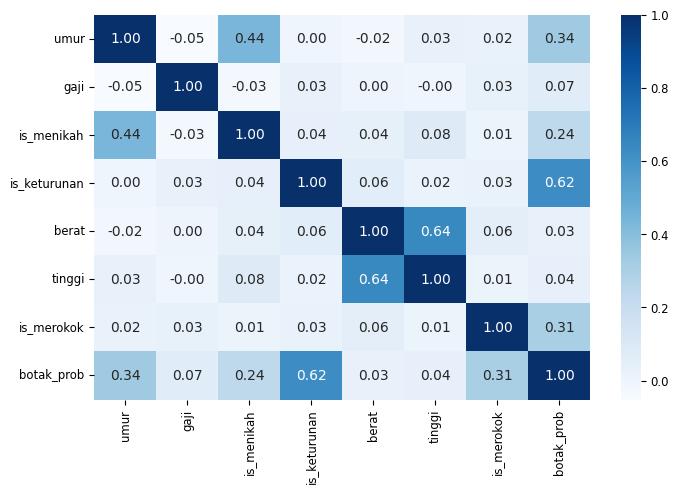

In [18]:
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

Dari *correlation heatmap* di atas dapat dilihat bahwa:
* Target kita `botak_prob` memiliki korelasi positif kuat dengan `is_keturunan`
* Ia juga memiliki korelasi positif lemah dengan `umur`, `is_menikah`, dan `is_merokok`
* `tinggi` juga memiliki korelasi positif kuat dengan `berat`. Ada kemungkinan kedua *feature* ini redundan

## EDA Conclusion
Beberapa hal yang kita temukan dari EDA dataset ini adalah:
* Data terlihat valid dan tidak ada kecacatan yang major
* Namun masih ada baris dengan target variabel bernilai negatif, yang mana tidak mungkin, jadi perlu didrop nantinya. 
* Juga masih ada data-data yang kosong/hilang, harus diurus ketika preprocessing
* Ada beberapa distribusi yang sedikit *skewed*, hal ini harus diingat apabila kita ingin melakukan sesuatu atau menggunakan model yang memerlukan asumsi distribusi normal
* Beberapa *feature* memiliki korelasi yang jelas dengan *target*, mereka akan dipakai
* Beberapa *feature* terlihat sama sekali tidak berkorelasi, mereka sebaiknya diabaikan
* Dari Heatmap: ada feature yang korelasinya tinggi satu sama lain (berat/tinggi) mungkin cuma akan dipakai satu